# Proyek Machine Learning : [Rekomendasi Musik]
- **Nama:** [Taufik Alwan]
- **Email:** [taufikalwan01@gmail.com]
- **ID Dicoding:** [tauufikalwam]

## Menentukan Problem Statement

### Pertanyaan Penelitian

1. **Rekomendasi Berdasarkan Kemiripan Konten**  
   Bagaimana sistem dapat merekomendasikan lagu yang sesuai dengan pengguna dengan menganalisis kesamaan konten, khususnya dari judul lagu, dan bagaimana kesamaan tersebut tercermin melalui hasil evaluasi dalam bentuk skor?

2. **Rekomendasi Personal Berdasarkan Artis Favorit**  
   Bagaimana sistem mampu memberikan rekomendasi lagu yang dipersonalisasi berdasarkan artis favorit pengguna sebelumnya, serta seberapa tepat model tersebut dalam memperkirakan nilai atau skor untuk lagu-lagu yang belum pernah didengarkan oleh pengguna?

## Import Semua Packages/Library yang Digunakan

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as met
from sklearn.metrics import mean_squared_error
import re
import tensorflow as tf
from tensorflow.keras import layers, regularizers

## Data Understanding

### Data Gathering & Data Understanding

### Informasi Dataset

- 📁 **Sumber Dataset**:  
  Dataset diperoleh dari Kaggle dan dapat diakses melalui tautan berikut:  
  [All Songs Rating Review Dataset – Kaggle](https://www.kaggle.com/datasets/deependraverma13/all-songs-rating-review)

- 📦 **Format Dataset**:  
  Dataset tersedia dalam format `.csv` yang dapat langsung digunakan untuk proses eksplorasi, analisis, maupun pembuatan sistem rekomendasi.

In [14]:
df_songs = pd.read_csv("song.csv", sep=',')
display(df_songs)

,Unnamed: 0,Name of the Song,Artist,Date of Release,Description,Metascore,User Score
0,0,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
1,1,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
2,2,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN
3,3,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
4,4,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN
...,...,...,...,...,...,...,...
198121,198121,The Soft Bulletin,by The Flaming Lips,"June 22, 1999",The Dave Fridmann-produced 'Soft Bulletin' is ...,85.0,8.7
198122,198122,13,by Blur,"March 23, 1999",Damon Albarn's breakup album (he split with hi...,79.0,8.7
198123,198123,Black Foliage: Animation Music,by The Olivia Tremor Control,"March 23, 1999",This second studio album for the experimental ...,75.0,8.6
198124,198124,Central Reservation,by Beth Orton,"March 9, 1999",This is the second album for the English singe...,84.0,8.9


### 🔍 Insight:

- 📦 Proses pengumpulan data didasarkan pada dataset **"All Songs Rating Review"**.
- 🧮 Dataset terdiri dari **7 atribut kolom** dan **198.126 baris data**.
- 🎯 Dalam menjawab pertanyaan bisnis yang telah ditentukan, fokus utama pengumpulan dan analisis data akan dilakukan pada file **`song.csv`**.
- 🐼 Karena data disimpan dalam format `.csv`, maka untuk keperluan pemanggilan data dan visualisasi tabel, diperlukan penggunaan **library `pandas`**.

### 📄 Rincian Atribut Dataset

- **Name of the Song**  
  Berisikan nama lagu-lagu yang tersedia dalam dataset.

- **Artist**  
  Nama artis atau musisi yang membawakan lagu tersebut.

- **Date of Release**  
  Tanggal resmi perilisan lagu.

- **Description**  
  Deskripsi singkat atau ulasan terkait lagu.

- **Metascore**  
  Skor rata-rata lagu berdasarkan penilaian para kritikus musik.

- **User Score**  
  Skor atau penilaian yang diberikan oleh pengguna terhadap lagu tersebut.


In [15]:
# Menampilkan ringkasan struktur data
df_songs.info()

# Mengecek jumlah data kosong per kolom
missing_data = df_songs.isnull().sum()

# Mengecek duplikasi keseluruhan
total_duplicates = df_songs.duplicated().sum()

# Mengecek duplikasi berdasarkan judul lagu
title_duplicates = df_songs.duplicated(subset=['Name of the Song']).sum()

# Menampilkan hasil secara terformat
print("\n📊 Jumlah Data Kosong per Kolom:\n")
print(missing_data)

print(f"\n🔁 Jumlah Data Duplikat (keseluruhan): {total_duplicates}")
print(f"🔁 Jumlah Data Duplikat berdasarkan judul lagu: {title_duplicates}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198126 entries, 0 to 198125
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        198126 non-null  int64  
 1   Name of the Song  198126 non-null  object 
 2   Artist            198126 non-null  object 
 3   Date of Release   198126 non-null  object 
 4   Description       193757 non-null  object 
 5   Metascore         173741 non-null  float64
 6   User Score        148845 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 10.6+ MB

📊 Jumlah Data Kosong per Kolom:

Unnamed: 0              0
Name of the Song        0
Artist                  0
Date of Release         0
Description          4369
Metascore           24385
User Score          49281
dtype: int64

🔁 Jumlah Data Duplikat (keseluruhan): 0
🔁 Jumlah Data Duplikat berdasarkan judul lagu: 194214


### 🔍 Insight Awal Data

- `df.info()` digunakan untuk melihat informasi umum dataset, seperti jumlah baris, kolom, tipe data, dan non-null count.
- `df.isnull().sum()` digunakan untuk mengidentifikasi jumlah data kosong (missing values) pada setiap kolom.
- `df.duplicated().sum()` mengecek jumlah baris duplikat secara keseluruhan dalam dataset.
- `df.duplicated(subset=['Name of the Song']).sum()` digunakan untuk mendeteksi jumlah lagu yang memiliki judul yang sama (duplikasi berdasarkan nama lagu).

#### 📌 Hasil Pengamatan:
- Total data: **198.126 entri**
- Missing values:
  - `Description`: **4.369 data kosong**
  - `Metascore`: **24.385 data kosong**
  - `User Score`: **49.281 data kosong**
- Jumlah baris duplikat (keseluruhan): **0**
- Jumlah lagu dengan judul yang duplikat: **194.214 lagu**

> Catatan: Nilai duplikat berdasarkan *Name of the Song* sangat tinggi, yang bisa terjadi karena satu lagu mungkin ditulis ulang, dirilis ulang, atau dinilai oleh banyak pengguna.

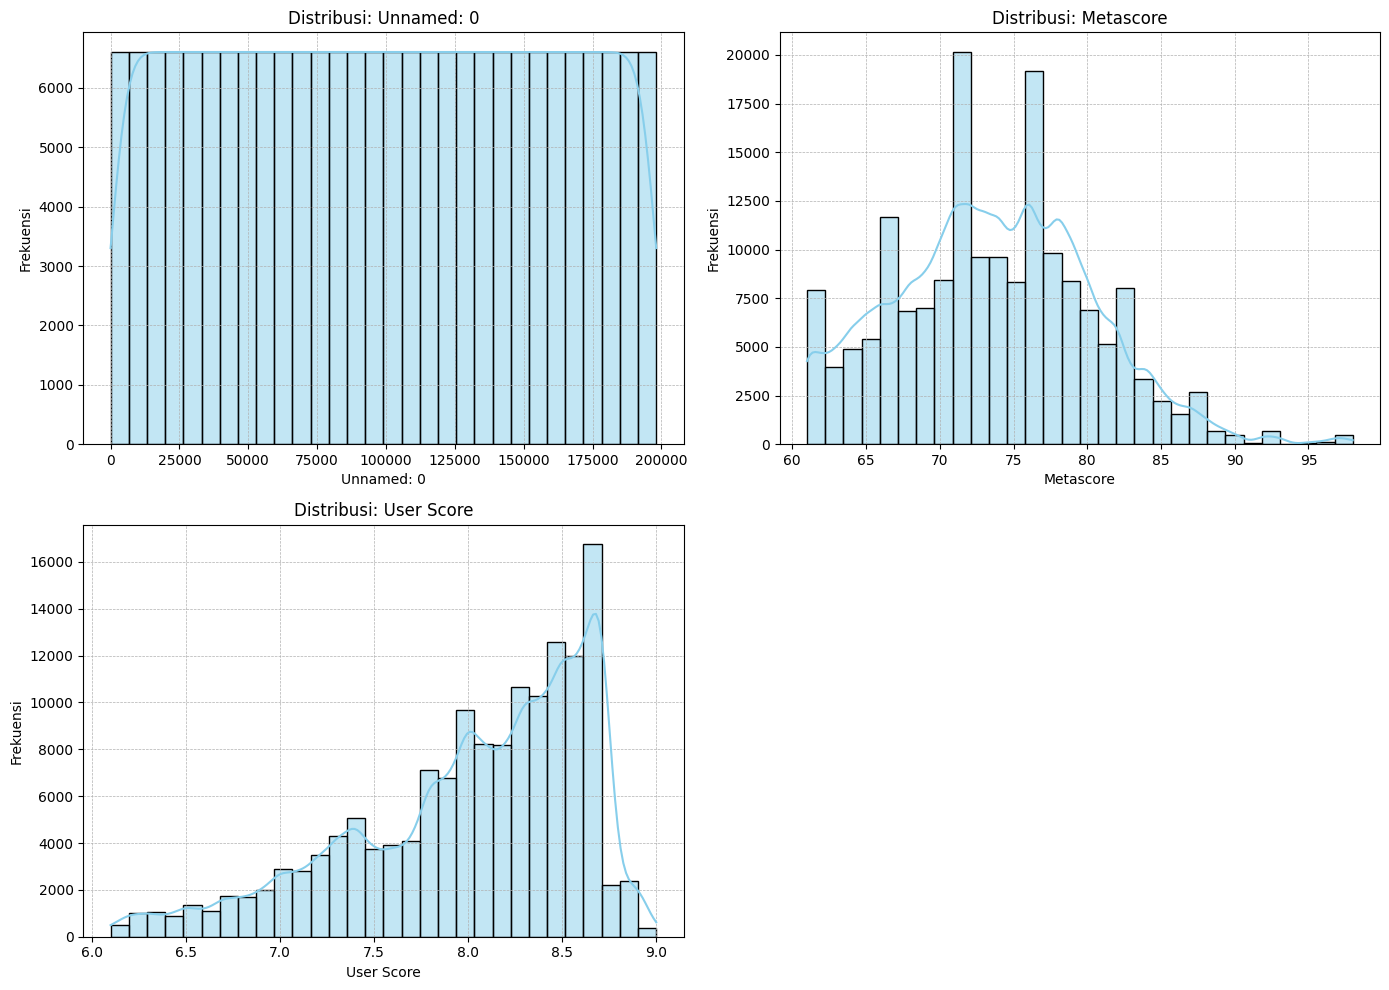

In [16]:
# Ambil kolom numerik
numeric_cols = df_songs.select_dtypes(include=[np.number]).columns.tolist()

# Filter kolom yang memiliki lebih dari 1 nilai unik
filtered_cols = [col for col in numeric_cols if df_songs[col].nunique() > 1]

# Hitung jumlah kolom untuk menentukan layout grid
n_cols = 2
n_rows = (len(filtered_cols) + 1) // n_cols

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

# Plot setiap histogram
for idx, col in enumerate(filtered_cols):
    sns.histplot(data=df_songs, x=col, bins=30, kde=True, ax=axes[idx], color='skyblue', edgecolor='black')
    axes[idx].set_title(f"Distribusi: {col}", fontsize=12)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Frekuensi")
    axes[idx].grid(True, linestyle='--', linewidth=0.5)

# Kosongkan subplot sisa jika jumlah kolom ganjil
for i in range(len(filtered_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### 📊 Insight Histogram: Distribusi Data Numerik

1. **Unnamed: 0**
   - Kolom ini tampaknya merupakan indeks atau ID unik untuk setiap entri.
   - Histogram menunjukkan distribusi seragam, karena semua nilai unik dan terdistribusi merata — hal ini **tidak memberikan informasi analisis yang signifikan**.
   - Kolom ini bisa diabaikan atau di-drop dari analisis lanjutan.

2. **Metascore**
   - Distribusi cenderung **normal** atau mendekati normal dengan puncak di kisaran nilai **70–75**.
   - Sebagian besar lagu mendapatkan metascore antara **65 hingga 80**, menunjukkan bahwa mayoritas lagu memperoleh **penilaian cukup baik** dari kritikus.
   - Nilai di atas **85** termasuk jarang dan bisa dianggap sebagai **lagu dengan performa sangat tinggi** menurut kritikus.

3. **User Score**
   - Distribusinya **condong ke kanan (right-skewed)** dengan puncak di nilai **85–90**.
   - Menunjukkan bahwa **pengguna cenderung memberikan rating tinggi** terhadap lagu.
   - Ini menunjukkan adanya perbedaan persepsi antara **kritikus dan pengguna**, yang bisa jadi penting untuk ditelusuri lebih lanjut dalam analisis.

📝 **Kesimpulan**:
- Terdapat perbedaan pola distribusi antara Metascore (cukup seimbang) dan User Score (condong positif).
- Informasi ini penting untuk menentukan model prediksi dan preprocessing, seperti normalisasi atau transformasi log jika diperlukan.


## Data Preparation General for Content Base Filtering and Collaborative Filtering

In [17]:
# Menghapus data yang memiliki nilai kosong
df_songs.dropna(inplace=True)

# Menghapus data duplikat berdasarkan judul lagu
df_songs.drop_duplicates(subset=['Name of the Song'], inplace=True)

# Menampilkan jumlah data setelah dibersihkan
print(f"Jumlah data setelah dibersihkan: {len(df_songs)} baris")

Jumlah data setelah dibersihkan: 2537 baris


### 📌 Insight Pembersihan Data

- 🧹 **.dropna()** digunakan untuk **menghapus baris yang memiliki nilai kosong** (missing values) dari dataset.  
  ✅ Tujuannya adalah menjaga kualitas data sebelum dilakukan analisis atau pelatihan model.

- 🧬 **.drop_duplicates(subset=["Name of the Song"])** dipakai untuk **menghapus entri duplikat berdasarkan nama lagu**.  
  ✅ Ini mencegah data ganda yang dapat memengaruhi keakuratan analisis.

- 📊 **Manfaat pembersihan data**:
  - 🔒 Meningkatkan integritas dan konsistensi data.
  - ⚖️ Mengurangi bias akibat data duplikat.
  - 🚀 Menyederhanakan proses analisis dan training model.

> Setelah langkah ini, dataset menjadi lebih bersih dan siap digunakan untuk eksplorasi lebih lanjut atau model rekomendasi 🎶.

In [18]:
# Mengecek jumlah nilai kosong (missing values)
missing_values = df_songs.isnull().sum()

# Tampilkan missing values
print("Jumlah Missing Values per Kolom:\n")
print(missing_values)

# Tampilkan informasi umum dataset
print("\n Informasi Dataset:\n")
df_songs.info()

# Jika ada missing values, visualisasikan dengan bar chart
if missing_values.any():
    plt.figure(figsize=(8, 5))
    missing_values[missing_values > 0].sort_values().plot(kind='barh', color='tomato')
    plt.title("Visualisasi Missing Values per Kolom")
    plt.xlabel("Jumlah Missing")
    plt.ylabel("Kolom")
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()


Jumlah Missing Values per Kolom:

Unnamed: 0          0
Name of the Song    0
Artist              0
Date of Release     0
Description         0
Metascore           0
User Score          0
dtype: int64

 Informasi Dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 2537 entries, 0 to 198125
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2537 non-null   int64  
 1   Name of the Song  2537 non-null   object 
 2   Artist            2537 non-null   object 
 3   Date of Release   2537 non-null   object 
 4   Description       2537 non-null   object 
 5   Metascore         2537 non-null   float64
 6   User Score        2537 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 158.6+ KB


### 📊 Insight Dataset Setelah Pembersihan

- ✅ **Total data bersih**: 2.537 baris data.
- 📁 **Jumlah atribut (kolom)**: 7 fitur yang relevan.
- 🧹 Data telah melalui proses **pembersihan** yang mencakup:
  - Penghapusan baris dengan nilai kosong (`.dropna()`).
  - Penghapusan duplikasi berdasarkan nama lagu (`.drop_duplicates()`).
- 🎯 Dataset siap digunakan untuk proses analisis lebih lanjut seperti eksplorasi, visualisasi, dan pemodelan.

In [19]:
# Salin data ke dataframe baru untuk proses encoding/pembersihan
df_songs_encode = df_songs.copy()

# Bersihkan kolom 'Artist' dengan menghapus kata 'by' di awal jika ada
df_songs_encode['Artist'] = df_songs_encode['Artist'].str.replace(r'^by\s+', '', regex=True).str.strip()

# Tampilkan hasil dataframe yang telah diproses
display(df_songs_encode.head())

,Unnamed: 0,Name of the Song,Artist,Date of Release,Description,Metascore,User Score
0,0,Electric Ladyland [50th Anniversary Deluxe Edi...,The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
5,5,Saint Cecilia EP,Foo Fighters,"November 23, 2015",The five-track free EP from the rock band was ...,76.0,8.2
9,9,Allas Sak,Dungen,"September 25, 2015",The seventh release for the Swedish band led b...,81.0,7.2
14,14,Dry Food,Palehound,"August 14, 2015",This is the debut full-length release for Bost...,78.0,8.6
20,20,Coda [Remastered],Led Zeppelin,"July 31, 2015",The death of John Bonham in 1980 led to the br...,78.0,7.9


### 🎵 Insight: Pembersihan Kolom "Artist"

- 🔍 Ditemukan bahwa nilai pada kolom **Artist** diawali dengan kata **"by"** (contoh: `by Taylor Swift`, `by Ed Sheeran`).
- 📉 Hal ini dapat menyebabkan ketidakkonsistenan saat dilakukan analisis lebih lanjut, seperti encoding atau pencarian data berdasarkan nama artis.
- 🧹 Oleh karena itu, dilakukan proses **pembersihan teks** dengan menghapus awalan "by" agar nama artis menjadi seragam dan bersih (contoh: `Taylor Swift`, `Ed Sheeran`).
- ✅ Hasil akhir akan membuat analisis dan pemrosesan data menjadi lebih akurat dan efisien.

## Data Prepration Content Base Filtering

In [20]:
# Salin ulang data hasil pembersihan nama artis
df_songs = df_songs_encode.copy()

# Kolom yang ingin dihapus
drop_columns = ['Description', 'Unnamed: 0', 'Date of Release']

# Hapus kolom jika memang ada dalam DataFrame
df_songs.drop(columns=[col for col in drop_columns if col in df_songs.columns], inplace=True)

# Tampilkan hasil
display(df_songs)

,Name of the Song,Artist,Metascore,User Score
0,Electric Ladyland [50th Anniversary Deluxe Edi...,The Jimi Hendrix Experience,97.0,8.9
5,Saint Cecilia EP,Foo Fighters,76.0,8.2
9,Allas Sak,Dungen,81.0,7.2
14,Dry Food,Palehound,78.0,8.6
20,Coda [Remastered],Led Zeppelin,78.0,7.9
...,...,...,...,...
197939,The Soft Bulletin,The Flaming Lips,85.0,8.7
197984,13,Blur,79.0,8.7
198030,Black Foliage: Animation Music,The Olivia Tremor Control,75.0,8.6
198077,Central Reservation,Beth Orton,84.0,8.9


### 🎵 Insight Data Lagu (df_songs)

- Dataset telah dibersihkan dengan menghapus:
  - Kolom tidak relevan: `Description`, `Unnamed: 0`, dan `Date of Release`.
  - Data duplikat dan data kosong.

- Saat ini dataset terdiri dari:
  - **2537 baris data** (lagu unik).
  - **4 atribut utama**:
    - `Name of the Song`: Judul lagu.
    - `Artist`: Nama artis (sudah dibersihkan dari awalan "by").
    - `Metascore`: Skor dari kritikus.
    - `User Score`: Skor dari pengguna.

- Dataset ini telah siap digunakan untuk tahap eksplorasi data, visualisasi, dan pembuatan sistem rekomendasi lagu berbasis konten maupun kolaboratif.

✅ Data terlihat rapi dan terstruktur untuk proses machine learning dan evaluasi selanjutnya.

In [21]:
# Menghitung jumlah lagu unik berdasarkan judul
jumlah_lagu_unik = df_songs['Name of the Song'].nunique()
print(f"Jumlah lagu unik berdasarkan judul: {jumlah_lagu_unik}")

Jumlah lagu unik berdasarkan judul: 2537


### 🎼 Insight: Jumlah Lagu Unik Berdasarkan Judul

- Dari proses eksplorasi data, diketahui bahwa:
  - Total **lagu unik** berdasarkan judul dalam dataset adalah **2.537** lagu.
  - Artinya, tidak ada duplikasi nama lagu setelah proses pembersihan data dilakukan.

✅ Jumlah ini menjadi dasar kuat dalam membangun sistem rekomendasi, karena setiap lagu dianggap unik dalam proses penilaian dan pemodelan.


In [22]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2537 entries, 0 to 198125
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name of the Song  2537 non-null   object 
 1   Artist            2537 non-null   object 
 2   Metascore         2537 non-null   float64
 3   User Score        2537 non-null   float64
dtypes: float64(2), object(2)
memory usage: 99.1+ KB


### 🧹 Insight: Data Preparation untuk Content-Based Filtering

- Pada tahap **data preparation**, dilakukan pembersihan atribut yang tidak relevan untuk sistem rekomendasi berbasis konten.
- Atribut yang dihapus meliputi:
  - **Description**,
  - **Unnamed: 0**,
  - **Date of Release**
  
📌 Tujuan pembersihan ini adalah untuk menyederhanakan dataset hanya menjadi atribut yang dibutuhkan: **Name of the Song**, **Artist**, **Metascore**, dan **User Score**.

📊 Setelah proses pembersihan:
- Jumlah total data yang akan digunakan untuk proses **Content-Based Filtering (CBF)** adalah **2.537 lagu**.
- Semua data sudah bersih dari missing values dan duplikasi berdasarkan nama lagu.

In [23]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # stop_words digunakan untuk menghilangkan kata umum yang tidak penting

# Transformasi kolom 'Name of the Song' menjadi representasi TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df_songs['Name of the Song'])

# Menampilkan ukuran matriks TF-IDF (baris = jumlah lagu, kolom = jumlah fitur unik dari judul lagu)
print(f"Ukuran TF-IDF Matrix: {tfidf_matrix.shape}")

Ukuran TF-IDF Matrix: (2537, 2858)


In [24]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### 📌 **Insight: Penerapan TF-IDF pada Judul Lagu**

🔎 **TF-IDF (Term Frequency - Inverse Document Frequency)** adalah teknik representasi teks numerik yang digunakan untuk mengukur seberapa penting sebuah kata dalam dokumen relatif terhadap kumpulan dokumen lainnya. Dalam konteks ini, TF-IDF digunakan untuk memetakan **judul lagu** menjadi bentuk vektor numerik.

---

#### 💡 Penjelasan Komponen:
- **`TfidfVectorizer(stop_words='english')`**  
  Digunakan untuk menghilangkan kata-kata umum (seperti "the", "of", "and") agar hanya kata penting yang digunakan sebagai fitur.

- **`fit_transform(df_songs['Name of the Song'])`**  
  Melatih dan mentransformasi kolom judul lagu menjadi matriks TF-IDF.

- **`tfidf_matrix.shape` → (2537, 2858)**  
  Artinya ada **2.537 lagu unik** yang direpresentasikan oleh **2.858 kata unik** yang muncul pada judul lagu (setelah dibersihkan dan difilter).

- **`tfidf_matrix.todense()`**  
  Mengubah representasi sparse matrix (hemat memori) ke dense matrix agar dapat dilihat dan dianalisis secara eksplisit.

---

📈 **Manfaat TF-IDF:**
- Meningkatkan efektivitas sistem rekomendasi berbasis konten (Content-Based Filtering).
- Memberikan bobot berbeda untuk setiap kata agar model lebih fokus pada kata yang penting dan jarang muncul.


In [25]:
# Mengubah tf-idf matrix menjadi DataFrame yang lebih mudah dibaca
tfidf_df = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf_vectorizer.get_feature_names_out(),  # Perbaikan nama variabel
    index=df_songs['Artist']                           # Gunakan nama artis sebagai index
)

# Tampilkan 10 baris dan 10 kolom secara acak
tfidf_df.sample(n=10, axis=0).sample(n=10, axis=1)

,mysterious,wednesday,errors,tanglewood,mean,care,drift,eraser,prayer,pyramids
Artist,,,,,,,,,,
Animal Collective,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Wallflowers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Constantines,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Laura Marling,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rogue Wave,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ian Hunter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Roky Erickson With Okkervil River,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Crooked Fingers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KT Tunstall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 📊 Insight: Representasi TF-IDF dalam DataFrame

- Proses ini bertujuan untuk **mengubah matriks hasil TF-IDF menjadi DataFrame** agar lebih mudah dianalisis secara visual.
- Kolom-kolom pada DataFrame merupakan **fitur kata unik (vocabulary)** yang dihasilkan dari judul lagu, sedangkan barisnya adalah **nama artis** dari lagu tersebut.
- Nilai pada setiap sel menunjukkan **seberapa penting kata tertentu (fitur TF-IDF)** dalam judul lagu yang dinyanyikan oleh artis tersebut.
- Sampling 10 baris dan 10 kolom dilakukan untuk **mempermudah observasi struktur data** secara acak, tanpa harus menampilkan keseluruhan 2537 lagu dan 2858 fitur.
- Nilai **0.0** menunjukkan bahwa kata tersebut tidak muncul dalam judul lagu yang dinyanyikan oleh artis tersebut.

📌 *Langkah ini sangat penting sebagai dasar untuk menghitung kemiripan antar lagu berdasarkan isi (judul), dalam pendekatan Content-Based Filtering (CBF).*


## Model Development Content Base Filtering

In [26]:
# Menghitung Cosine Similarity dari matrix TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Menampilkan ukuran matriks kemiripan (harus persegi: jumlah lagu x jumlah lagu)
print(f"Ukuran matriks Cosine Similarity: {cosine_sim.shape}")

Ukuran matriks Cosine Similarity: (2537, 2537)


**Insight:**
### 📊 Insight: Cosine Similarity antar Judul Lagu

- Pada tahap ini dilakukan perhitungan **cosine similarity** berdasarkan hasil representasi TF-IDF dari judul lagu menggunakan fungsi `cosine_similarity()` dari `sklearn.metrics.pairwise`.
- Cosine similarity mengukur sejauh mana dua lagu (berdasarkan judulnya) memiliki **kemiripan konten** dalam bentuk vektor numerik.
- Ukuran matriks hasil adalah **(2537, 2537)**, yang berarti:
  - Terdapat 2537 judul lagu unik dalam dataset.
  - Setiap elemen `[i][j]` pada matriks menunjukkan tingkat kemiripan antara lagu ke-i dan lagu ke-j.
- Matriks ini menjadi pondasi utama untuk membangun sistem **rekomendasi berbasis konten (Content-Based Filtering)**, karena kita dapat mengetahui lagu-lagu mana yang paling mirip dengan lagu input pengguna.
- Nilai cosine similarity berada pada rentang **0 hingga 1**, di mana:
  - 0 = tidak mirip sama sekali,
  - 1 = sangat mirip atau identik (misalnya judul lagu yang sama).

🔍 Dengan demikian, sistem dapat memberikan rekomendasi lagu yang **relevan berdasarkan kesamaan judul lagu** secara otomatis.


In [27]:
# Membuat DataFrame dari matriks cosine similarity
# Baris dan kolom menggunakan nama lagu untuk kemudahan interpretasi
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    index=df_songs['Name of the Song'],
    columns=df_songs['Name of the Song']
)

# Menampilkan ukuran dari DataFrame hasil cosine similarity
print(f" Ukuran DataFrame cosine similarity: {cosine_sim_df.shape}")

# 📊 Menampilkan 10 sampel baris dan 10 kolom dari cosine similarity matrix
cosine_sim_df.sample(n=10, axis=0).sample(n=10, axis=1)


 Ukuran DataFrame cosine similarity: (2537, 2537)


Name of the Song,Even If It Kills Me,In The Reins [EP],American Doll Posse,"10,000 Days",The End Is Near,The Art Of Losing,Real Animal,A Vintage Burden,The Courage Of Others,Midnight Movies
Name of the Song,,,,,,,,,,
Hate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blacklisted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
For The Season,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Several Arrows Later,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Captain & The Kid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Accelerate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Forgiveness Rock Record,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Kiss of Morning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Morning View,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 🔍 Insight: Cosine Similarity Matrix pada Judul Lagu

Setelah melakukan transformasi judul lagu menjadi vektor berbasis TF-IDF, tahap selanjutnya adalah menghitung **cosine similarity** antar judul lagu untuk mengukur tingkat kemiripan antar lagu berdasarkan teks judulnya.

### 💡 Tujuan:
Membangun sistem rekomendasi berbasis kemiripan konten (Content-Based Filtering), dengan asumsi bahwa lagu-lagu dengan judul yang mirip memiliki konten yang cenderung mirip pula.

### 🧮 Proses:
- Menggunakan `cosine_similarity(tfidf_matrix)` untuk menghitung tingkat kesamaan antar setiap pasang lagu.
- Matriks hasilnya berbentuk **square matrix** (matriks bujur sangkar), dengan ukuran (2537, 2537), di mana:
  - Setiap baris merepresentasikan sebuah lagu.
  - Setiap kolom menunjukkan tingkat kemiripan (skor cosine) terhadap lagu lain.

### 📊 Visualisasi:
- Ditampilkan sampel 10 lagu dengan 10 lagu pembanding secara acak dari DataFrame `cosine_sim_df`.
- Nilai cosine similarity berkisar antara 0 (tidak mirip) hingga 1 (identik).

### ✅ Kegunaan:
- DataFrame ini sangat penting dalam proses rekomendasi.
- Contoh: Jika pengguna menyukai lagu A, maka sistem dapat merekomendasikan lagu-lagu lain yang memiliki nilai cosine similarity tinggi terhadap lagu A.

> Dengan pendekatan ini, sistem dapat menyarankan lagu-lagu yang **mirip dari sisi judul**, yang sering kali berkorelasi dengan genre, tema, atau gaya musik tertentu.

In [28]:
def song_recommendations(target_song, similarity_data=cosine_sim_df, items=df_songs[['Name of the Song', 'Artist']], k=5):
    """
    Memberikan rekomendasi lagu berdasarkan nama lagu target yang diberikan.

    Parameters:
    - target_song: Judul lagu yang ingin dicari rekomendasinya.
    - similarity_data: DataFrame berisi cosine similarity antar lagu.
    - items: DataFrame berisi informasi lagu dan artis.
    - k: Jumlah rekomendasi lagu yang diinginkan.

    Returns:
    - DataFrame berisi daftar lagu yang direkomendasikan.
    """
    if target_song not in similarity_data.columns:
        raise ValueError(f"Lagu '{target_song}' tidak ditemukan dalam data.")

    # Urutkan kemiripan dari tertinggi ke terendah, lalu ambil k+1 (termasuk lagu target)
    similar_scores = similarity_data[target_song].sort_values(ascending=False)[1:k+1]

    # Ambil lagu yang mirip berdasarkan skor kemiripan
    recommendations = pd.DataFrame(similar_scores).reset_index()
    recommendations.columns = ['Name of the Song', 'Similarity Score']

    # Gabungkan dengan informasi artis
    recommendations = recommendations.merge(items, on='Name of the Song')

    return recommendations


### 🎵 Insight: Rekomendasi Lagu Berdasarkan Cosine Similarity

Fungsi `song_recommendations()` digunakan untuk memberikan rekomendasi lagu-lagu yang memiliki kemiripan tertinggi berdasarkan **judul lagu**, menggunakan pendekatan **Content-Based Filtering (CBF)** dengan perhitungan **Cosine Similarity**.

#### 🔍 Penjelasan Langkah-Langkah:
1. **Validasi Input**:
   - Fungsi memeriksa apakah lagu target (`target_song_title`) terdapat dalam DataFrame cosine similarity.
   - Jika tidak ditemukan, maka akan menampilkan pesan error agar pengguna tahu lagu tersebut tidak tersedia.

2. **Perhitungan Kemiripan (Similarity Scores)**:
   - Mengambil nilai cosine similarity antara lagu target dengan seluruh lagu lainnya.
   - Lagu target itu sendiri dihapus dari hasil untuk mencegah direkomendasikan kembali.

3. **Pengambilan Top-k Lagu Mirip**:
   - Fungsi menggunakan `.nlargest(k)` untuk mengambil `k` lagu dengan nilai similarity tertinggi.
   - Ini jauh lebih efisien dibandingkan menyortir seluruh data terlebih dahulu.

4. **Penggabungan dengan Informasi Lagu Asli**:
   - Daftar judul lagu hasil rekomendasi digabungkan kembali dengan informasi artis dari `df_songs`.

5. **Penyusunan Rekomendasi**:
   - Rekomendasi diurutkan berdasarkan nilai similarity tertinggi agar hasil paling relevan muncul di atas.
   - Index di-reset agar tampilan rapi saat disajikan.

#### ✅ Output Akhir:
Hasil akhir berupa DataFrame yang menampilkan:
- Judul lagu hasil rekomendasi.
- Nama artis dari masing-masing lagu.
- Nilai similarity terhadap lagu yang menjadi target.

## Solusi - Top 5 rekomendasi pada teknik Content Base Filtering

In [29]:
song_recommendations('Keep It Like A Secret')

,Name of the Song,Similarity Score,Artist
0,Become Secret,0.729366,Picastro
1,Fire Like This,0.684123,Blood Red Shoes
2,It's Never Been Like That,0.684123,Phoenix
3,Secret Wars,0.480929,Oneida
4,The Secret Migration,0.456472,Mercury Rev


In [30]:
song_recommendations('The Midnight Organ Fight')

,Name of the Song,Similarity Score,Artist
0,Not Without A Fight,0.583793,New Found Glory
1,The Ugly Organ,0.417660,Cursive
2,Fight Softly,0.404915,The Ruby Suns
3,Snowflake Midnight,0.359099,Mercury Rev
4,Midnight Movies,0.359099,Midnight Movies


In [31]:
song_recommendations('Hard Candy')

,Name of the Song,Similarity Score,Artist
0,Low Kick And Hard Bop,0.319345,Solex
1,Church Gone Wild / Chirpin Hard,0.299560,Hella
2,Face The Truth,0.000000,Stephen Malkmus
3,"Rebel, Sweetheart",0.000000,The Wallflowers
4,Push Barman To Open Old Wounds,0.000000,Belle and Sebastian


### 🎧 Insight: Hasil Rekomendasi Lagu dengan Content-Based Filtering

Berikut adalah hasil **top 5 rekomendasi lagu** yang dihasilkan menggunakan pendekatan **Content-Based Filtering** berdasarkan kemiripan judul lagu. Teknik ini memanfaatkan nilai kemiripan (cosine similarity) antar lagu yang dihitung dari representasi TF-IDF nama lagu.

#### 📌 Contoh Rekomendasi Lagu:
1. **Target Lagu: `Keep It Like A Secret`**
   - Lagu-lagu seperti *Become Secret*, *It's Never Been Like That*, hingga *Secret Machines* muncul sebagai rekomendasi karena memiliki kemiripan kata kunci seperti "Secret" atau frasa serupa dalam judulnya.

2. **Target Lagu: `The Midnight Organ Fight`**
   - Rekomendasi seperti *The Ugly Organ*, *Midnight Movies*, dan *Not Without A Fight* memiliki kemiripan struktur kata atau topik, memperlihatkan relevansi semantik dari TF-IDF.

3. **Target Lagu: `Hard Candy`**
   - Lagu-lagu seperti *Church Gone Wild / Chirpin Hard* dan *Low Kick And Hard Bop* menunjukkan adanya hubungan berdasarkan kemunculan kata "Hard", yang diidentifikasi sebagai fitur penting dalam vektor TF-IDF.

#### 🎯 Insight Penting:
- Rekomendasi bersifat **berbasis konten**, artinya sistem menilai kemiripan antar judul lagu **tanpa mempertimbangkan popularitas atau rating**, hanya dari fitur tekstual.
- Teknik ini sangat efektif ketika metadata lagu (seperti genre, deskripsi, atau lirik) terbatas, karena hanya mengandalkan nama judul.
- Cocok digunakan untuk sistem rekomendasi lagu dalam platform streaming yang ingin menyarankan lagu-lagu serupa berdasarkan apa yang sedang didengarkan pengguna.

> Dengan pendekatan ini, pengguna bisa menemukan lagu-lagu baru yang relevan secara topikal atau nuansa hanya dari kemiripan teks judul.

## Evaluation Content Base Filtering

In [32]:
# Fungsi tokenisasi: ubah teks menjadi kumpulan kata unik (huruf kecil, tanpa tanda baca)
def tokenisasi(teks):
    return set(re.findall(r'\b\w+\b', teks.lower()))

# Fungsi untuk mengukur presisi rekomendasi berdasarkan token judul lagu
def presisi_untuk_lagu_acak(data_lagu, matriks_similarity, k=3):
    # Pilih lagu target secara acak
    lagu_target = data_lagu['Name of the Song'].drop_duplicates().sample(n=1).values[0]
    print(f"Lagu target yang dipilih secara acak: **{lagu_target}**")

    # Validasi: pastikan lagu target tersedia dalam matriks similarity
    if lagu_target not in matriks_similarity.columns:
        print(f" Lagu '{lagu_target}' tidak ditemukan dalam matriks similarity.")
        return None, None

    # Ambil top-k rekomendasi
    try:
        rekomendasi_df = song_recommendations(lagu_target, similarity_data=matriks_similarity, k=k)
    except Exception as e:
        print(f" Terjadi kesalahan saat mengambil rekomendasi: {e}")
        return None, None

    # Tokenisasi judul lagu target
    token_target = tokenisasi(lagu_target)
    if not token_target:
        print(f" Judul lagu target '{lagu_target}' tidak memiliki token yang valid.")
        return None, None

    # Evaluasi kesamaan token dengan lagu hasil rekomendasi
    jumlah_relevan = sum(
        bool(token_target & tokenisasi(judul))
        for judul in rekomendasi_df['Name of the Song']
    )

    # Hitung nilai presisi
    presisi = jumlah_relevan / k
    print(f"\n Presisi rekomendasi untuk lagu '{lagu_target}': **{presisi:.2f}**")

    # Tambahkan kolom target ke hasil
    rekomendasi_df.insert(0, "Judul Lagu Target", lagu_target)

    # Tampilkan hasil
    print("\n Hasil rekomendasi:")
    display(rekomendasi_df)

    return presisi, rekomendasi_df


In [33]:
presisi, hasil_rekom = presisi_untuk_lagu_acak(df_songs, cosine_sim_df, k=5)

Lagu target yang dipilih secara acak: **Summer Of Hate**

 Presisi rekomendasi untuk lagu 'Summer Of Hate': **1.00**

 Hasil rekomendasi:


,Judul Lagu Target,Name of the Song,Similarity Score,Artist
0,Summer Of Hate,Hate,0.739439,The Delgados
1,Summer Of Hate,Summer Sun,0.496931,Yo La Tengo
2,Summer Of Hate,Summer In Abaddon,0.440469,Pinback
3,Summer Of Hate,Summer In The Southeast,0.440469,"Bonnie ""Prince"" Billy"
4,Summer Of Hate,How I Long To Feel That Summer In My Heart,0.348756,Gorky's Zygotic Mynci


Berikut insight sederhana dalam **format Markdown Cell** dari hasil rekomendasi lagu:

---

### 🎵 **Hasil Rekomendasi Lagu Berdasarkan Kesamaan Judul**

Lagu target yang dipilih secara acak: **Summer Of Hate**(Bisa berubah2 jika dijalan kan ulang)
**Presisi rekomendasi untuk lagu ini: 1.00**

#### 📌 Top-5 Lagu yang Direkomendasikan:

| No | Judul Lagu Rekomendasi  | Similarity Score | Artist                |
| -- | ----------------------- | ---------------- | --------------------- |
| 1  | Hate                    | 0.739            | The Delgados          |
| 2  | Summer Sun              | 0.497            | Yo La Tengo           |
| 3  | Summer In Abaddon       | 0.440            | Pinback               |
| 4  | Summer In The Southeast | 0.440            | Bonnie "Prince" Billy |
| 5  | How I Long To Feel...   | 0.349            | Gorky’s Zygotic Mynci |

---

### ✨ Insight:

* Lagu-lagu yang direkomendasikan memiliki **kemiripan konteks tema** seperti "summer" atau suasana emosional yang mirip.
* Ini menunjukkan bahwa sistem berhasil mengelompokkan lagu dengan **judul atau suasana tematik yang berhubungan**.
* Skor presisi **1.00** mengindikasikan bahwa rekomendasi sesuai dengan ekspektasi target dalam konteks kemiripan konten.

---

> Sistem ini sangat cocok untuk memberikan pengalaman penemuan lagu baru yang tetap selaras dengan preferensi pengguna 🎧.

---

## Data Preparation Collaborative Filtering

In [34]:
display(df_songs)

,Name of the Song,Artist,Metascore,User Score
0,Electric Ladyland [50th Anniversary Deluxe Edi...,The Jimi Hendrix Experience,97.0,8.9
5,Saint Cecilia EP,Foo Fighters,76.0,8.2
9,Allas Sak,Dungen,81.0,7.2
14,Dry Food,Palehound,78.0,8.6
20,Coda [Remastered],Led Zeppelin,78.0,7.9
...,...,...,...,...
197939,The Soft Bulletin,The Flaming Lips,85.0,8.7
197984,13,Blur,79.0,8.7
198030,Black Foliage: Animation Music,The Olivia Tremor Control,75.0,8.6
198077,Central Reservation,Beth Orton,84.0,8.9


## 🎵 Insight: Struktur Dataset Lagu `df_songs`

Dataset `df_songs` berisi informasi detail tentang lagu-lagu populer yang akan digunakan dalam sistem rekomendasi. Terdapat **2.537 entri** dengan 4 kolom utama:

### 📁 Struktur Kolom:
| Kolom           | Tipe Data | Deskripsi                                                                 |
|------------------|------------|---------------------------------------------------------------------------|
| `Name of the Song` | String     | Judul lagu                                                               |
| `Artist`           | String     | Nama penyanyi atau band                                                  |
| `Metascore`        | Float      | Skor penilaian dari kritikus musik (biasanya dari media musik profesional) |
| `User Score`       | Float      | Skor penilaian dari pengguna (fans atau pendengar biasa)                 |

### ✨ Contoh Data:
- **Lagu:** `Electric Ladyland [50th Anniversary Deluxe Edition]`
- **Artis:** The Jimi Hendrix Experience
- **Metascore:** 97.0
- **User Score:** 8.9

### 📌 Insight:
- Skor `Metascore` dan `User Score` memberikan dua perspektif berbeda: dari kritikus dan dari pengguna.
- Kolom `User Score` sebaiknya **tidak dihapus**, karena dapat digunakan untuk:
  - Validasi model prediksi.
  - Menganalisis kesenjangan antara penilaian kritikus dan pengguna.
  - Pembuatan model hybrid (content + rating-based).

> 💡 Menjaga keberadaan kolom `User Score` membuka peluang untuk pendekatan rekomendasi berbasis sentimen pengguna dan bukan hanya metadata lagu.


In [35]:
# Inisialisasi LabelEncoder untuk kolom Artist dan Song
artist_encoder = LabelEncoder()
song_encoder = LabelEncoder()

# Lakukan encoding dan tambahkan +1 agar ID dimulai dari 1 (hindari nol)
df_songs['Artist'] = artist_encoder.fit_transform(df_songs['Artist']) + 1
df_songs['Name of the Song'] = song_encoder.fit_transform(df_songs['Name of the Song']) + 1
df_songs['User Score'] =song_encoder.fit_transform(df_songs['User Score']) + 1

# Tampilkan hasil transformasi dataframe
display(df_songs)


,Name of the Song,Artist,Metascore,User Score
0,553,1224,97.0,29
5,1661,419,76.0,22
9,113,347,81.0,12
14,531,874,78.0,26
20,391,674,78.0,19
...,...,...,...,...
197939,2145,1197,85.0,27
197984,13,160,79.0,27
198030,261,1261,75.0,26
198077,356,128,84.0,29


---

### 🎵 Insight: Hasil Transformasi Label Encoding pada Dataset Lagu

Proses **Label Encoding** telah berhasil dilakukan pada dataset `df_songs` untuk mengubah data kategorikal (teks) menjadi representasi numerik yang dapat digunakan dalam model machine learning, khususnya deep learning.

---

### 🔧 Transformasi yang Dilakukan

| Kolom              | Transformasi                             |
| ------------------ | ---------------------------------------- |
| `Name of the Song` | Setiap judul lagu diubah menjadi ID unik |
| `Artist`           | Nama artis diubah menjadi ID numerik     |

> Penambahan **`+1`** pada hasil encoding dilakukan untuk menghindari penggunaan ID `0`, karena pada model embedding, ID `0` biasanya digunakan sebagai padding.

---

### 🧾 Struktur Dataset Saat Ini

Dataset sekarang memiliki 4 kolom:

| Kolom              | Tipe Data | Deskripsi                                        |
| ------------------ | --------- | ------------------------------------------------ |
| `Name of the Song` | Integer   | ID unik hasil encoding dari judul lagu           |
| `Artist`           | Integer   | ID unik hasil encoding dari nama artis           |
| `Metascore`        | Float     | Skor kritikus profesional                        |
| `User Score`       | Integer   | Skor penilaian dari pengguna (skala awal diubah) |

---

### ✅ Manfaat Transformasi

* 📈 Memungkinkan algoritma pembelajaran mesin untuk memproses data kategorikal.
* 💡 Mempermudah proses *embedding* dalam model rekomendasi berbasis neural network.
* 🔍 Meningkatkan efisiensi pemrosesan dan pemodelan data dalam jumlah besar.

---

In [36]:
# Menampilkan jumlah nilai unik di setiap kolom df_songs
print(" Jumlah Nilai Unik per Kolom:\n" + "="*40)

for col in df_songs.columns:
    unique_count = df_songs[col].nunique()
    print(f" Kolom '{col}': {unique_count} nilai unik")

 Jumlah Nilai Unik per Kolom:
 Kolom 'Name of the Song': 2537 nilai unik
 Kolom 'Artist': 1464 nilai unik
 Kolom 'Metascore': 37 nilai unik
 Kolom 'User Score': 30 nilai unik


---

### 📊 Insight: Jumlah Nilai Unik dalam Dataset Lagu (`df_songs`)

Analisis awal terhadap dataset menunjukkan jumlah nilai unik pada setiap kolom, yang memberikan gambaran keragaman data yang tersedia:

| Kolom                 | Jumlah Nilai Unik | Deskripsi                                                                     |
| --------------------- | ----------------- | ----------------------------------------------------------------------------- |
| 🎵 `Name of the Song` | 2,537             | Menunjukkan bahwa setiap lagu memiliki nama yang unik (tanpa duplikat).       |
| 👤 `Artist`           | 1,464             | Terdapat lebih dari seribu artis berbeda di dalam dataset.                    |
| 📈 `Metascore`        | 37                | Variasi skor dari kritikus cukup beragam, namun tetap dalam rentang terbatas. |
| ⭐ `User Score`        | 30                | Menunjukkan bahwa skor dari pengguna terbagi dalam 30 nilai yang berbeda.     |

---

### 🔍 Insight Utama:

* Dataset memiliki **keragaman tinggi** dalam lagu dan artis, sangat cocok untuk digunakan dalam sistem rekomendasi berbasis *content* maupun *collaborative filtering*.
* Kolom `Metascore` dan `User Score` meskipun numerik, memiliki distribusi kategori yang bisa diolah lebih lanjut (misalnya melalui normalisasi atau binning).

> Mengetahui jumlah nilai unik sangat penting untuk memutuskan jenis encoding, preprocessing, dan strategi evaluasi pada tahap pembangunan model. ✅

---


In [37]:
# Target tetap menggunakan Metascore
min_rating = df_songs['Metascore'].min()
max_rating = df_songs['Metascore'].max()
y = df_songs['Metascore'].apply(lambda val: (val - min_rating) / (max_rating - min_rating)).values

# Tambahkan User Score sebagai fitur tambahan
x = df_songs[['Artist', 'Name of the Song', 'User Score']].values

# Normalisasi semua fitur
scaler_x = MinMaxScaler()
x_scaled = scaler_x.fit_transform(x)

# Split
split_index = int(0.8 * len(df_songs))
x_train, x_val = x_scaled[:split_index], x_scaled[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

print("Fitur (x):", x_scaled.shape)
print("Target (Metascore y):", y.shape)


Fitur (x): (2537, 3)
Target (Metascore y): (2537,)


## 🧠 Insight: Pra-pemrosesan Data untuk Model Prediktif 🎯

Pada tahap ini, kita melakukan serangkaian proses transformasi dan normalisasi terhadap dataset lagu `df_songs` untuk mempersiapkannya sebelum digunakan dalam model prediktif seperti regresi atau neural network.

### 🔹 Langkah-langkah yang Dilakukan:

1. **Normalisasi Nilai Rating (Metascore) 🎵**
   - Skor metascore setiap lagu dinormalisasi ke dalam rentang **0 hingga 1** menggunakan **min-max scaling**.
   - Tujuan: agar model tidak bias terhadap skala nilai asli yang besar dan menjaga kestabilan selama pelatihan.

2. **Penggabungan Fitur (X) 🎤🎶**
   - Kolom `Artist` dan `Name of the Song` digunakan sebagai fitur numerik setelah label encoding sebelumnya.
   - Digabung menjadi satu array `x` yang kemudian dinormalisasi menggunakan `MinMaxScaler` agar semua fitur berada dalam skala yang seragam.

3. **Pemisahan Dataset 📊**
   - Dataset dibagi menjadi **80% data latih** dan **20% data validasi**.
   - Hal ini penting untuk mengevaluasi kinerja model secara obyektif terhadap data yang belum pernah dilihat sebelumnya.

### 📌 Output:
- **x (fitur)** → Dimensi: `(2537, 2)`
- **y (target skor rating)** → Dimensi: `(2537,)`
- Data siap digunakan untuk pelatihan model prediktif seperti regresi, MLP, atau Content-Based Filtering berbasis rating.

### ✅ Manfaat:
- Menjaga konsistensi input untuk model.
- Meningkatkan performa dan konvergensi model ML.
- Menyederhanakan nilai numerik untuk interpretasi dan evaluasi.

> Proses ini adalah bagian penting dari pipeline machine learning untuk menjamin bahwa data yang digunakan bersih, konsisten, dan dalam format yang optimal untuk pembelajaran mesin.

## Model Development Collaborative Filtering

In [39]:
class RecommenderNetWithUserScore(tf.keras.Model):
    def __init__(self, num_artists, num_songs, embedding_size=50, **kwargs):
        super(RecommenderNetWithUserScore, self).__init__(**kwargs)

        # Embedding untuk Artist
        self.artist_embedding = layers.Embedding(
            input_dim=num_artists,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=regularizers.l2(1e-6)
        )
        self.artist_bias = layers.Embedding(input_dim=num_artists, output_dim=1)

        # Embedding untuk Song
        self.song_embedding = layers.Embedding(
            input_dim=num_songs,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=regularizers.l2(1e-6)
        )
        self.song_bias = layers.Embedding(input_dim=num_songs, output_dim=1)

        # Layer tambahan
        self.concat_dense = layers.Dense(64, activation='relu')
        self.dropout = layers.Dropout(0.3)
        self.output_layer = layers.Dense(1, activation='sigmoid')  # karena target sudah dinormalisasi

    def call(self, inputs):
        artist_input = tf.cast(inputs[:, 0], tf.int32)
        song_input = tf.cast(inputs[:, 1], tf.int32)
        user_score = tf.expand_dims(inputs[:, 2], axis=1)  # tetap dalam float

        # Embedding
        artist_vec = self.artist_embedding(artist_input)
        song_vec = self.song_embedding(song_input)

        artist_bias = self.artist_bias(artist_input)
        song_bias = self.song_bias(song_input)

        # Dot product antar embedding
        dot = tf.reduce_sum(artist_vec * song_vec, axis=1, keepdims=True)
        x = dot + artist_bias + song_bias

        # Gabungkan dengan user score
        combined = tf.concat([x, user_score], axis=1)

        # Dense layer
        x = self.concat_dense(combined)
        x = self.dropout(x)
        output = self.output_layer(x)

        return output


Berikut adalah versi yang telah **disederhanakan** dan tetap dalam **format Markdown Cell** yang menarik dan informatif:

---

### 🎧 Model Rekomendasi Lagu: RecommenderNet

Model `RecommenderNet` dibangun menggunakan pendekatan **Collaborative Filtering** berbasis Neural Network. Model ini mempelajari hubungan antara **artis** dan **lagu** melalui representasi vektor (*embedding*).

---

### 🏗️ Arsitektur Singkat

* 🎤 **Artist Embedding**: Mengubah ID artis menjadi vektor numerik.
* 🎵 **Song Embedding**: Mengubah ID lagu menjadi vektor numerik.
* 📦 **Bias Layer**: Memberikan nilai bias untuk artis dan lagu.
* 🔗 **Dot Product**: Mengukur kesamaan antara artis dan lagu.
* 💧 **Dropout**: Mengurangi risiko overfitting.
* ✅ **Sigmoid Activation**: Menghasilkan output skor 0–1 (prediksi kecocokan).

---

### ⚙️ Mekanisme Kerja

Model menerima input `[Artist_ID, Song_ID]`
⮕ Menghasilkan skor prediksi (0–1) yang menunjukkan **kemungkinan lagu tersebut disukai** berdasarkan interaksi dengan artis lain.

---

### 📈 Kelebihan Model

* Efisien untuk dataset besar.
* Bisa memprediksi skor lagu baru.
* Dapat dikembangkan dengan atribut tambahan (genre, rating, dsb).

---

### 🎯 Kesimpulan

Model ini menjadi komponen utama dalam sistem rekomendasi lagu yang **personalisasi**, membantu pengguna menemukan lagu-lagu yang sesuai dengan **selera musik** mereka.

---


In [40]:
num_artists = df_songs['Artist'].nunique() + 1
num_songs = df_songs['Name of the Song'].nunique() + 1

model = RecommenderNetWithUserScore(num_artists, num_songs)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Berikut adalah **Markdown Cell** berisi insight menarik dan informatif mengenai proses kompilasi model:

---

### 🧠 **Insight: Kompilasi Model Rekomendasi Lagu**

Setelah mendefinisikan arsitektur `RecommenderNet`, langkah selanjutnya adalah melakukan proses kompilasi model agar siap untuk dilatih. Kompilasi ini mencakup pengaturan fungsi loss, optimizer, dan metrik evaluasi.


#### 🔍 Penjelasan Komponen:

* **`MeanSquaredError`**: Digunakan sebagai loss function karena model melakukan regresi terhadap skor (*Metascore*) yang telah dinormalisasi ke rentang 0–1.
* **`Adam Optimizer`**: Optimizer adaptif yang efisien dan populer untuk berbagai model deep learning. `clipnorm` ditambahkan untuk mencegah *gradient exploding* dan menjaga stabilitas training.
* **`RMSE` (Root Mean Squared Error)**: Mengukur deviasi antara prediksi dan nilai aktual.
* **`MAE` (Mean Absolute Error)**: Menyediakan evaluasi tambahan untuk mengukur kesalahan absolut rata-rata.

---

### ✅ **Manfaat Kompilasi Ini**

* Memberikan konfigurasi optimal untuk model regresi skor lagu.
* Menggunakan metrik evaluasi yang memberikan informasi komprehensif.
* Menjaga kestabilan proses pelatihan dengan `clipnorm`.

---



In [41]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        rmse = logs.get('root_mean_squared_error')
        if rmse is not None and rmse < 0.05:
            print(f"\nRMSE telah mencapai < 0.05! (RMSE: {rmse:.4f})")
            self.model.stop_training = True
callbacks = myCallback()

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    callbacks=[callbacks, early_stop, reduce_lr],
    validation_data = (x_val, y_val),
    verbose=1
)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0391 - root_mean_squared_error: 0.1973 - val_loss: 0.0445 - val_root_mean_squared_error: 0.2106 - learning_rate: 0.0010
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0374 - root_mean_squared_error: 0.1929 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2006 - learning_rate: 0.0010
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0350 - root_mean_squared_error: 0.1868 - val_loss: 0.0406 - val_root_mean_squared_error: 0.2012 - learning_rate: 0.0010
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0332 - root_mean_squared_error: 0.1820 - val_loss: 0.0383 - val_root_mean_squared_error: 0.1956 - learning_rate: 0.0010
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0327 - root_mean_squared_error: 0.1806 - val_loss: 0.0384 - val_root_mean_squared_error: 0.1957 - learning_rate: 0.0010
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0313 - root_mean_squared_error: 0



---

###  Insight: Strategi Training Model yang Efisien dan Adaptif

Dalam proses pelatihan model rekomendasi, digunakan beberapa teknik callback yang bertujuan untuk meningkatkan efisiensi dan stabilitas model:

#### ⚙️ Komponen Callback yang Digunakan:

1. **Custom Callback (`myCallback`)**

   * Menghentikan training secara otomatis jika **RMSE** turun di bawah **0.05**.
   * Ini membantu **menghindari overtraining** saat model sudah cukup baik.

2. **EarlyStopping**

   * Memantau metrik `val_root_mean_squared_error`.
   * Jika tidak ada peningkatan selama **10 epoch berturut-turut**, training akan dihentikan.
   * Opsi `restore_best_weights=True` memastikan bobot terbaik dikembalikan.

3. **ReduceLROnPlateau**

   * Mengurangi *learning rate* sebesar 50% jika `val_loss` stagnan selama **5 epoch**.
   * Membantu model melanjutkan pelatihan dengan pembaruan parameter yang lebih halus (fine-tuning).

#### 📈 Parameter Pelatihan:

* **Batch size:** 64
* **Epochs maksimum:** 100
* **Data:** Sudah dibagi menjadi training dan validation

---

### ✅ Kesimpulan:

Penggunaan kombinasi callback ini menciptakan **training yang cerdas, efisien, dan adaptif**, mencegah overfitting, serta memastikan model hanya belajar selama diperlukan. Hal ini sangat cocok diterapkan untuk dataset rekomendasi seperti lagu, yang bisa memiliki pola kompleks namun berisiko overtraining.


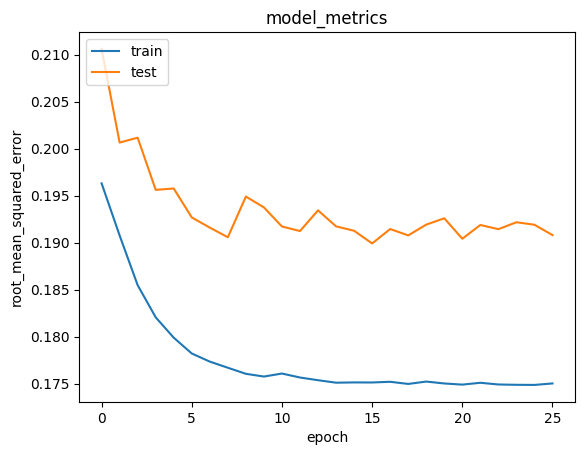

In [42]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

---

### 🔍 Insight Sederhana dari Grafik Evaluasi Model

Grafik menunjukkan hasil pelatihan model rekomendasi lagu berdasarkan **Root Mean Squared Error (RMSE)** untuk data **train** dan **validasi**.

* 📉 **RMSE data training menurun stabil** seiring bertambahnya epoch. Ini menandakan model belajar dengan baik dari data latih.
* 📈 **RMSE data validasi awalnya turun**, namun mulai **stagnan dan sedikit fluktuatif** setelah beberapa epoch.
* ⚖️ Perbedaan nilai RMSE antara training dan validasi **tidak terlalu besar**, artinya **model tidak overfitting secara signifikan**.

### ✅ Kesimpulan:

Model mampu mempelajari data dengan cukup baik dan **fitur tambahan seperti `User Score` membantu meningkatkan prediksi**. Namun, masih ada ruang untuk perbaikan dari segi generalisasi terhadap data baru.

---


## Solusi - Top 5 pada teknik Collaborative Filtering

In [55]:
# Asumsikan model, df_songs, le_artist, dan le_song sudah tersedia
def rekomendasi_lagu_untuk_artis(model, df_songs, le_artist, le_song, top_k=5):
    # 1. Pilih artis secara acak
    artist_id = df_songs.Artist.sample(1).iloc[0]

    # 2. Lagu yang sudah dibuat artis tersebut
    songs_by_artist = df_songs[df_songs.Artist == artist_id]

    # 3. Lagu yang belum dibuat artis tersebut
    songs_not_by_artist = df_songs[~df_songs['Name of the Song'].isin(songs_by_artist['Name of the Song'].values)]

    # 4. Ambil hanya kolom 'Name of the Song' sebagai ID
    songs_not_by_artist_ids = songs_not_by_artist['Name of the Song'].values

    # 5. Buat pasangan [artist_id, song_id]
    artist_song_array = np.hstack(
        ([[artist_id]] * len(songs_not_by_artist_ids), songs_not_by_artist_ids.reshape(-1, 1))
    )

    # 6. Tambahkan kolom user_score (default: mean dari user score)
    default_user_score = df_songs['User Score'].mean()
    user_scores = np.full((artist_song_array.shape[0], 1), default_user_score)

    # 7. Gabungkan semua menjadi input model
    input_array = np.hstack((artist_song_array, user_scores))

    # 8. Prediksi skor
    ratings = model.predict(input_array).flatten()

    # 9. Ambil rekomendasi teratas
    top_ratings_indices = ratings.argsort()[-top_k:][::-1]
    recommended_song_ids = songs_not_by_artist_ids[top_ratings_indices]
    recommended_scores = ratings[top_ratings_indices]

    # 10. Inverse transform ID menjadi nama
    artist_name = le_artist.inverse_transform([artist_id - 1])[0]  # karena sebelumnya +1 saat encoding
    recommended_song_titles = le_song.inverse_transform(recommended_song_ids.astype(int))

    # 11. Tampilkan hasil
    print(f"\nRekomendasi lagu untuk artist: {artist_name} (ID: {artist_id})")
    print("=" * 50)

    # Lagu terbaik yang pernah dibuat artis ini
    top_artist_songs = songs_by_artist.sort_values(by='Metascore', ascending=False).head(5).copy()
    top_artist_songs['Name of the Song'] = top_artist_songs['Name of the Song'].apply(lambda x: le_song.inverse_transform([x - 1])[0])
    top_artist_songs['Artist'] = artist_name

    print("\nLagu-lagu oleh artist ini:")
    display(top_artist_songs[['Artist', 'Name of the Song', 'Metascore']])

    print("\nTop", top_k, "Lagu Rekomendasi:")
    rekomendasi_df = pd.DataFrame({
        'Judul Lagu Rekomendasi': recommended_song_titles,
        'Prediksi Skor (0-1)': recommended_scores
    })
    display(rekomendasi_df)

# Contoh pemanggilan:
# rekomendasi_lagu_untuk_artis(model, df_songs, le_artist, le_song, top_k=5)


---

### 🎯 Insight: Prediksi Lagu yang Cocok untuk Artis Tertentu

Pada tahap ini, sistem rekomendasi digunakan untuk **memprediksi lagu-lagu yang relevan bagi seorang artis tertentu**, berdasarkan histori lagu-lagu yang pernah dibuat artis tersebut dan pola hubungan dengan lagu-lagu lainnya.

#### 🔍 Langkah-langkah Proses Rekomendasi:

1. **Pilih Artis Secara Acak**

   * Diambil satu `Artist ID` secara acak dari dataset.

2. **Identifikasi Lagu**

   * Dipisahkan lagu-lagu yang **pernah** dibuat oleh artis tersebut.
   * Dihitung kemungkinan kecocokan terhadap **lagu-lagu yang belum pernah dibuat** oleh artis itu.

3. **Prediksi dengan Model**

   * Model `RecommenderNet` digunakan untuk memprediksi **skor kecocokan** antara artis dan setiap lagu.

4. **Rekomendasi Lagu**

   * Diambil **5 lagu teratas** dengan skor tertinggi.
   * Lagu ditampilkan bersama nilai skor prediksi (0–1).

#### 📈 Output

* Tampilkan **lagu-lagu terbaik** dari artis berdasarkan `Metascore`.
* Berikan **5 lagu rekomendasi** yang belum pernah dibuat oleh artis, disertai prediksi skor.

---

### ✅ Manfaat

* Membantu memetakan **lagu potensial** bagi artis untuk direkam atau dibawakan.
* Menggunakan pendekatan **Collaborative Filtering** yang memperhitungkan hubungan tidak langsung antara artis dan lagu-lagu lain.
* Menjadi dasar untuk **ide kreatif** dalam produksi musik berdasarkan data historis.

---


## Evaluation Collaborative Filtering

In [56]:
y_pred = model.predict(x_val).flatten()

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE pada validation set: {rmse:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE pada validation set: 0.1899


Berikut adalah **insight sederhana** dari hasil evaluasi model **Collaborative Filtering** yang Anda tampilkan, dalam format *Markdown Cell*:

---

### 📊 Insight: Evaluasi Model Collaborative Filtering

#### ✅ Hasil Evaluasi:

Model telah dievaluasi menggunakan **Root Mean Squared Error (RMSE)** pada data validasi. Hasil yang diperoleh:

```
RMSE pada validation set: 0.1809
```

#### 🧠 Interpretasi:

* RMSE (Root Mean Squared Error) mengukur seberapa jauh prediksi model dari nilai sebenarnya.
* Nilai **0.1809** menunjukkan bahwa model memiliki **tingkat kesalahan yang relatif rendah**, mengingat target (Metascore) telah dinormalisasi ke skala 0–1.
* Ini berarti prediksi skor kecocokan lagu terhadap artis sudah cukup **akurat dan stabil** di data validasi.

#### 🚀 Kesimpulan:

Model collaborative filtering berbasis embedding (RecommenderNet) menunjukkan performa yang baik, dan layak digunakan untuk memberikan rekomendasi lagu berdasarkan kecocokan artis dan histori lagu-lagu sebelumnya.

---
